# Practica II: Visualización de Datos

* __Equipo:__ 1
* __Grupo:__ 003 (Lunes 6:00 p.m. - 9:00 p.m.) 
* __Integrantes:__ 
    * 1941599 ESTEBAN AVALOS ARANZA ALEJANDRA
    * 1941460 AVILA CASTRO INGRID MARIANA
    * 1941600 CARDENAS GARCIA OSCAR ANDRES
    * 1850355 GARCÍA SALAZAR VALERIA GUADALUPE
    * 1941504 GONZÁLEZ PÉREZ ANA VICTORIA
    
### Base de datos principal
 * __Nombre:__ Student Alcohol Consumption
 * __URL:__ https://www.kaggle.com/uciml/student-alcohol-consumption
 
### Base de datos secundaria
 * __Nombre:__ Fast Food Restaurants Across America
 * __URL:__ https://www.kaggle.com/kumarajarshi/life-expectancy-who?select=Life+Expectancy+Data.csv

## Base principal

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df1=pd.read_csv("student-mat.csv")


Una vez importada la base nos deshacemos de los datos que consideramos irrelevantes al analisis como el trabajo y educación de los papás de los estudiantes, si están en una relación, la distancia de su casa en relación a la escuela, si tienen internet, etc. Tambíen cambiamos los nombres de varias columnas y de sus elementos para facilitar su entendimiento.

In [138]:
# Quitamos las columnas innecesarias
df= df1.drop(["school", "Fjob", "Mjob", "Medu", "Fedu", "reason","guardian", "traveltime", "schoolsup", "famsup", "paid", "internet", "nursery", "romantic", "health", "address"],axis=1)

# Cambiamos el nombre a las columnas: 
df= df.rename (columns = {"school": "Escuela"})
df= df.rename (columns = {"sex": "Sexo"})
df= df.rename (columns = {"age": "Edad"})
df= df.rename (columns = {"famsize": "Tamaño_Fam"})
df= df.rename (columns = {"Pstatus": "Convivencia_padres"})
df= df.rename (columns = {"studytime": "Tiempo_estudio"})
df= df.rename (columns = {"failures": "Reprobadas"})
df= df.rename (columns = {"activities": "Extracurriculares"})
df= df.rename (columns = {"health": "Salud"})
df= df.rename (columns = {"freetime": "Tiempo_libre"})
df= df.rename (columns = {"goout": "Salir"})
df= df.rename (columns = {"Walc": "Alc_fines"})
df= df.rename (columns = {"Dalc": "Alc_semana"})
df= df.rename (columns = {"absences": "Faltas"})
df= df.rename (columns = {"higher": "Universidad"})
df= df.rename (columns = {"G1": "Cal 1 (0-20)"})
df= df.rename (columns = {"G2": "Cal 2 (0-20)"})
df= df.rename (columns = {"G3": "Cal 3 (0-20)"})

#Cambiamos el nombre a los valores de las columnas
df.Tamaño_Fam.replace(to_replace = dict(GT3 = "4 o +", LE3 = "3 o -"), inplace = True)
df.Convivencia_padres.replace(to_replace = dict(A = "Separados", T = "Juntos"), inplace = True)
df.Extracurriculares.replace(to_replace = dict(yes = "Si", no = "No"), inplace = True)
df.Universidad.replace(to_replace = dict(yes = "Si", no = "No"), inplace = True)
df

,Sexo,Edad,Tamaño_Fam,Convivencia_padres,Tiempo_estudio,Reprobadas,Extracurriculares,Universidad,famrel,Tiempo_libre,Salir,Alc_semana,Alc_fines,Faltas,Cal 1 (0-20),Cal 2 (0-20),Cal 3 (0-20)
0,F,18,4 o +,Separados,2,0,No,Si,4,3,4,1,1,6,5,6,6
1,F,17,4 o +,Juntos,2,0,No,Si,5,3,3,1,1,4,5,5,6
2,F,15,3 o -,Juntos,2,3,No,Si,4,3,2,2,3,10,7,8,10
3,F,15,4 o +,Juntos,3,0,Si,Si,3,2,2,1,1,2,15,14,15
4,F,16,4 o +,Juntos,2,0,No,Si,4,3,2,1,2,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,3 o -,Separados,2,2,No,Si,5,5,4,4,5,11,9,9,9
391,M,17,3 o -,Juntos,1,0,No,Si,2,4,5,3,4,3,14,16,16
392,M,21,4 o +,Juntos,1,3,No,Si,5,5,3,3,3,3,10,8,7
393,M,18,3 o -,Juntos,1,0,No,Si,4,4,1,3,4,0,11,12,10


## Estadística básica
A continuación haremos uso de las funciones estadísticas básicas de python para explorar la base de datos.

La edad legal para comprar cerveza y vino en Portugal (donde habitan los estudiantes de la muestra) es de 16 años, para el resto de las bebidas es a los 18, la mayoría de edad, veamos cuantos alumnos pueden beber legalmente:

In [139]:
menores=sum(df.Edad<16)
cv=sum(df.Edad<18)-menores
mayores=sum(df.Edad>17)
print("La cantidad de alumnos que son menores de edad es:", menores)
print("La cantidad de alumnos que pueden consumir cerveza y vino es:", cv)
print("La cantidad de alumnos que son mayores de edad es:", mayores)


La cantidad de alumnos que son menores de edad es: 82
La cantidad de alumnos que pueden consumir cerveza y vino es: 202
La cantidad de alumnos que son mayores de edad es: 111


In [202]:

prom=round(df["Tiempo_estudio"].mean(),2)
print("Del 1 al 5, el promedio de tiempo que estos estudiantes dedican a estudiar es:", prom,"\n")

faltas=df["Faltas"].cumsum()
print("La suma acumulada de las faltas de todos los alumnos es: \n ", faltas)

fp=round(sum(df["Faltas"])/len(df),2)
print("\nEl promedio de faltas por alumno en un ciclo escolar es:",fp)

Del 1 al 5, el promedio de tiempo que estos estudiantes dedican a estudiar es: 2.04 

La suma acumulada de las faltas de todos los alumnos es: 
  0         6
1        10
2        20
3        22
4        26
       ... 
390    2244
391    2247
392    2250
393    2250
394    2255
Name: Faltas, Length: 395, dtype: int64

El promedio de faltas por alumno en un ciclo escolar es: 5.71


La función "describe" nos hace un resumen de varios detalles estadísticos, usémosla para analizar la columna de clases reprobadas:

In [203]:
df["Reprobadas"].describe()


count    395.000000
mean       0.334177
std        0.743651
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: Reprobadas, dtype: float64

Como los primeros 3 cuartiles son cero podemos deducir que al menos el 75% no ha reprobado ninguna materia.

Ahora usaremos el resto de las medidas estadísticas para analizar la columna de relaciones intrafamiliares de los estudiantes,  la cual se mide del 1 al 5 siendo el 1 una relacion mala y el 5 una muy buena. Esto lo hacemos ya que una mala relacion intrafamiliar puede ser un factor contribuyente al alcoholismo en un individuo.

In [204]:
mini=df['famrel'].min()
maxi=df['famrel'].max()
mediana=df['famrel'].median()
var=df['famrel'].var()
desv=df['famrel'].std()
asi=df['famrel'].skew()
curt=df['famrel'].kurt()
prom=df["famrel"].mean()
print("El promedio de las relaciones es:", prom, "\nEl valor de relacion intrafamiliar mínimo es: ",mini," \nLa relación intrafamiliar máxima es: ",maxi," \nLa mediana es: ",mediana)
print("La varianza es:", var, ". \nLa desviación estándar es:", desv,"\nEl valor de asimetría de la columna es:", asi,"\nEl valor de curtosis es:", curt)

El promedio de las relaciones es: 3.9443037974683546 
El valor de relacion intrafamiliar mínimo es:  1  
La relación intrafamiliar máxima es:  5  
La mediana es:  4.0
La varianza es: 0.8039966587418893 . 
La desviación estándar es: 0.8966586076885056 
El valor de asimetría de la columna es: -0.951881690060932 
El valor de curtosis es: 1.1397722938283108


Podemos concluir que la mayoría de los estdudiantes tiene buenas relaciones con sus famliares. La asimetría negativa nos dice que la curva de los datos se inclina hacia valores mayores y por el promedio y mediana podemos ver que nuestra conclusión es acertada.

Tablas de correlación y covarianza:

In [205]:
df.corr()

,Edad,Tiempo_estudio,Reprobadas,famrel,Tiempo_libre,Salir,Alc_semana,Alc_fines,Faltas,Cal 1 (0-20),Cal 2 (0-20),Cal 3 (0-20),Alc_total,media
Edad,1.000000e+00,-4.140037e-03,2.436654e-01,5.394010e-02,1.643439e-02,1.269639e-01,1.311246e-01,1.172761e-01,1.752301e-01,-6.408150e-02,-1.434740e-01,-1.615794e-01,1.349723e-01,2.434039e-15
Tiempo_estudio,-4.140037e-03,1.000000e+00,-1.735630e-01,3.973070e-02,-1.431984e-01,-6.390368e-02,-1.960193e-01,-2.537847e-01,-6.270018e-02,1.606119e-01,1.358800e-01,9.781969e-02,-2.526979e-01,-6.009180e-16
Reprobadas,2.436654e-01,-1.735630e-01,1.000000e+00,-4.433663e-02,9.198747e-02,1.245609e-01,1.360469e-01,1.419620e-01,6.372583e-02,-3.547176e-01,-3.558956e-01,-3.604149e-01,1.532033e-01,-5.382225e-18
famrel,5.394010e-02,3.973070e-02,-4.433663e-02,1.000000e+00,1.507014e-01,6.456841e-02,-7.759436e-02,-1.133973e-01,-4.435409e-02,2.216832e-02,-1.828135e-02,5.136343e-02,-1.084266e-01,-1.540008e-16
Tiempo_libre,1.643439e-02,-1.431984e-01,9.198747e-02,1.507014e-01,1.000000e+00,2.850187e-01,2.090008e-01,1.478218e-01,-5.807792e-02,1.261293e-02,-1.377714e-02,1.130724e-02,1.897535e-01,-3.005293e-18
Salir,1.269639e-01,-6.390368e-02,1.245609e-01,6.456841e-02,2.850187e-01,1.000000e+00,2.669938e-01,4.203857e-01,4.430222e-02,-1.491040e-01,-1.622500e-01,-1.327915e-01,3.926829e-01,-4.767057e-16
Alc_semana,1.311246e-01,-1.960193e-01,1.360469e-01,-7.759436e-02,2.090008e-01,2.669938e-01,1.000000e+00,6.475442e-01,1.119080e-01,-9.415879e-02,-6.412018e-02,-5.466004e-02,8.691396e-01,2.156853e-16
Alc_fines,1.172761e-01,-2.537847e-01,1.419620e-01,-1.133973e-01,1.478218e-01,4.203857e-01,6.475442e-01,1.000000e+00,1.362911e-01,-1.261792e-01,-8.492735e-02,-5.193932e-02,9.396800e-01,-5.298762e-16
Faltas,1.752301e-01,-6.270018e-02,6.372583e-02,-4.435409e-02,-5.807792e-02,4.430222e-02,1.119080e-01,1.362911e-01,1.000000e+00,-3.100290e-02,-3.177670e-02,3.424732e-02,1.386875e-01,2.062989e-17
Cal 1 (0-20),-6.408150e-02,1.606119e-01,-3.547176e-01,2.216832e-02,1.261293e-02,-1.491040e-01,-9.415879e-02,-1.261792e-01,-3.100290e-02,1.000000e+00,8.521181e-01,8.014679e-01,-1.241575e-01,3.316126e-16


In [206]:
df.cov()

,Edad,Tiempo_estudio,Reprobadas,famrel,Tiempo_libre,Salir,Alc_semana,Alc_fines,Faltas,Cal 1 (0-20),Cal 2 (0-20),Cal 3 (0-20),Alc_total,media
Edad,1.628285,-0.004434,0.231221,0.061717,0.020947,0.180364,0.149039,0.192733,1.789501,-0.271413,-0.688653,-0.944612,0.341772,0.0
Tiempo_estudio,-0.004434,0.704324,-0.108321,0.029898,-0.120041,-0.059706,-0.146533,-0.274304,-0.421127,0.447401,0.428947,0.376110,-0.420838,0.0
Reprobadas,0.231221,-0.108321,0.553017,-0.029564,0.068329,0.103123,0.090118,0.135964,0.379265,-0.875557,-0.995528,-1.227932,0.226081,0.0
famrel,0.061717,0.029898,-0.029564,0.803997,0.134974,0.064454,-0.061974,-0.130952,-0.318287,0.065977,-0.061659,0.211000,-0.192926,0.0
Tiempo_libre,0.020947,-0.120041,0.068329,0.134974,0.997725,0.316944,0.185954,0.190163,-0.464274,0.041817,-0.051764,0.051745,0.376116,0.0
Salir,0.180364,-0.059706,0.103123,0.064454,0.316944,1.239388,0.264763,0.602744,0.394718,-0.550967,-0.679438,-0.677292,0.867506,0.0
Alc_semana,0.149039,-0.146533,0.090118,-0.061974,0.185954,0.264763,0.793420,0.742852,0.797758,-0.278385,-0.214836,-0.223061,1.536272,0.0
Alc_fines,0.192733,-0.274304,0.135964,-0.130952,0.190163,0.602744,0.742852,1.658678,1.404774,-0.539388,-0.411425,-0.306464,2.401529,0.0
Faltas,1.789501,-0.421127,0.379265,-0.318287,-0.464274,0.394718,0.797758,1.404774,64.049541,-0.823556,-0.956596,1.255703,2.202532,0.0
Cal 1 (0-20),-0.271413,0.447401,-0.875557,0.065977,0.041817,-0.550967,-0.278385,-0.539388,-0.823556,11.017053,10.638836,12.187682,-0.817773,0.0


## Gráficas
Comenzamos con algunos gráficos de barra que nos ayuden a conocer a los estudiantes de la muestra. Empezando por el género:

Text(3.674999999999997, 0.5, 'Número de estudiantes')

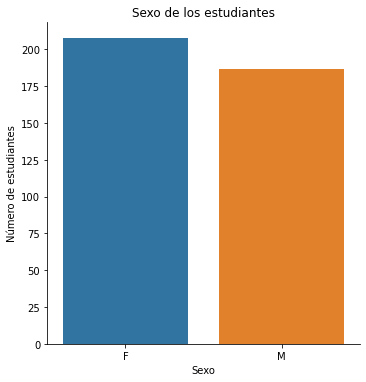

In [207]:
sns.catplot(x="Sexo", kind="count", data=df)
plt.title("Sexo de los estudiantes")
plt.ylabel("Número de estudiantes")

Vemos que la mayoría son mujeres. Ahora conozcamos las edades:

Text(0, 0.5, 'Número de estudiantes')

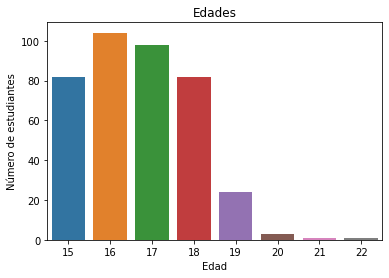

In [208]:
sns.countplot(df.Edad)
plt.title("Edades")
plt.ylabel("Número de estudiantes")

La grán mayoría se encuentran en edad legal para consumo con mayor concentración entre los 15-18 años; alrededor de 80 alumnos son menores de edad y por ende no deberían tener acceso a bebidas alcoholicas.
Veamos si esto se refleja en el consumo de alcohol:

Text(0.5, 0, 'Consumo semanal de alcohol (1-10)')

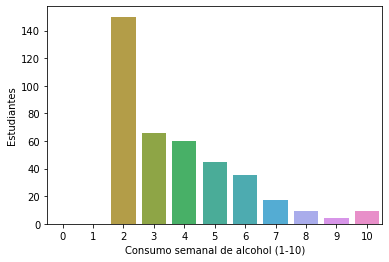

In [209]:
# Sumamos el consumo entre semana y el consumo de los fines para analizar el consumo total por semana
df["Alc_total"]=df["Alc_semana"]+df["Alc_fines"]

list = []
for i in range(11):
    list.append(len(df[df.Alc_total == i]))
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Estudiantes')
plt.xlabel('Consumo semanal de alcohol (1-10)')

En la gráfica apreciamos que todos los estudiantes consumen bebidas alcohólicas cada semana con una frecuencia de al menos 2 de 10. Esto nos lleva a dos probables situaciones en las que los alumnos menores de edad consumen bebidas alcoholicas: 
* Por razones culturales como cosstumbres, religión, etc.
* Por razones sociales o personales.

Para observar la curva de relaciones familiares mencionada previamente la graficaremos:

<AxesSubplot:>

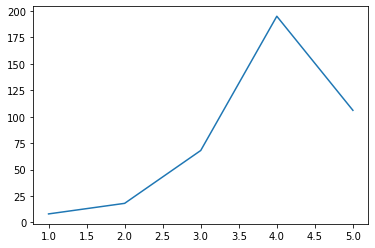

In [210]:
df["famrel"].value_counts().sort_index().plot.line()

Vemos que nuestra teoría es correcta y la mayoría de los estudiantes mantiene relaciones sanas con su familia.

Ahora un histograma para visualizar las faltas por alumno:

<AxesSubplot:xlabel='Faltas', ylabel='Count'>

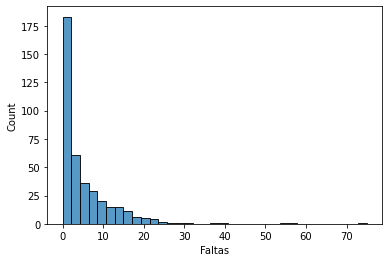

In [211]:
sns.histplot(df["Faltas"])

Gran parte de los estudiantes no registraron ninguna falta en el ciclo escolar y podemos ver unos valores atípicos que pueden respresentar casos especiales o errores en el registro.

 Ahora veremos cómo afecta el consumo de alcohol a las calificaciones de los estudiantes

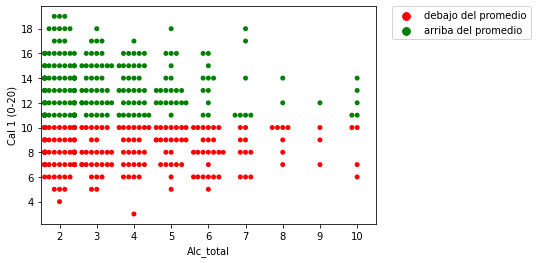

In [212]:
prom = sum(df["Cal 1 (0-20)"])/float(len(df))
df['promedio'] = ['arriba del promedio' if i > prom else 'debajo del promedio' for i in df["Cal 1 (0-20)"]]
sns.swarmplot(x='Alc_total', y = 'Cal 1 (0-20)', hue = 'promedio',data= df,palette={'arriba del promedio':'green', 'debajo del promedio': 'red'})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Observamos que entre mayor sea el consumo hay más estudiantes debajo del promedio que arriba de él y que los estudiantes con mayor consumo no suelen tener calificaciones exepcionales. Tambíen es evidente que los que tienen mejores calificaciones se concentran en consumos bajos.

Un mapa de calor de correlaciones de toda la base de datos para tener una representación visual de lo calculado en la parte estadística:

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'Edad'),
  Text(0, 1.5, 'Tiempo_estudio'),
  Text(0, 2.5, 'Reprobadas'),
  Text(0, 3.5, 'famrel'),
  Text(0, 4.5, 'Tiempo_libre'),
  Text(0, 5.5, 'Salir'),
  Text(0, 6.5, 'Alc_semana'),
  Text(0, 7.5, 'Alc_fines'),
  Text(0, 8.5, 'Faltas'),
  Text(0, 9.5, 'Cal 1 (0-20)'),
  Text(0, 10.5, 'Cal 2 (0-20)'),
  Text(0, 11.5, 'Cal 3 (0-20)'),
  Text(0, 12.5, 'Alc_total'),
  Text(0, 13.5, 'media')])

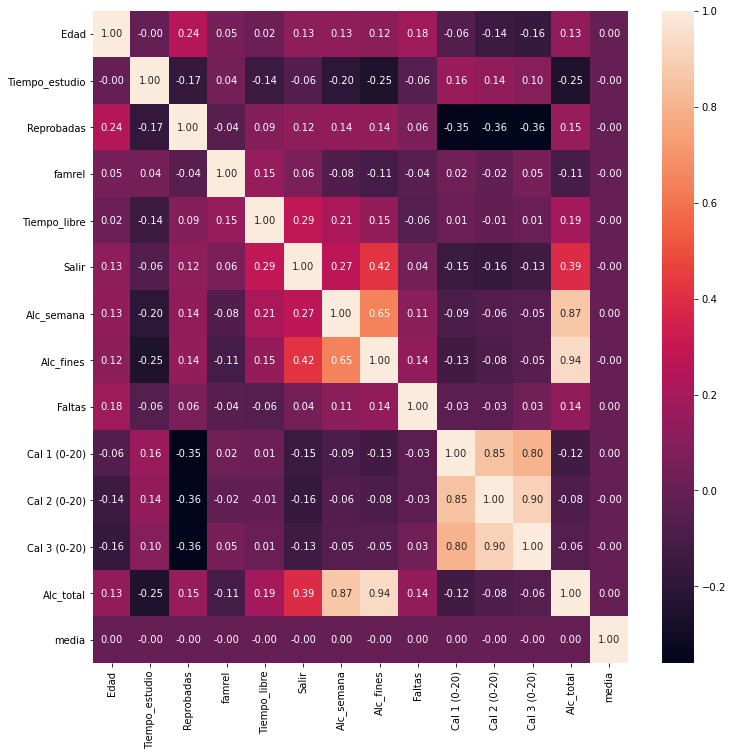

In [213]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

Podemos apreciar que las variables más correlacionadas son las calificaciones parciales de los alumnos, lo cual nos dice que sus calificaciones fueron muy similares en los 3 periodos.

Otro dato que destaca es la correlación entre el consumo de alcohol los fines y entre semana, significa que los alumnos que toman entre semana tienden a tomar los fines también y viceversa. También hay correlación considerable de salir con alc_fines, esto nos dice que es probable que si una persona no sale tampoco toma o que una persona que sale más es probablemente un consumidor de alcohol.

Por último hacemos énfasis a las correlaciones negativas entre las calificaciones y las clases reprobadas, de esto entendemos que la mayoría de los estudiantes tienen calificaciones aprobatorias.

Sin embargo hay una correlación que no podemos ver en este mapa porque los datos no son numéricos asi que hagamos un box plot e histogrma de frecuencias para ver cómo impacta en las calificaciones de un alumno su deseo de cursar o no una carrera universitaria:

Text(0.5, 1.0, 'Distribucion de calificaciones de quienes NO quieren estudiar una carrera')

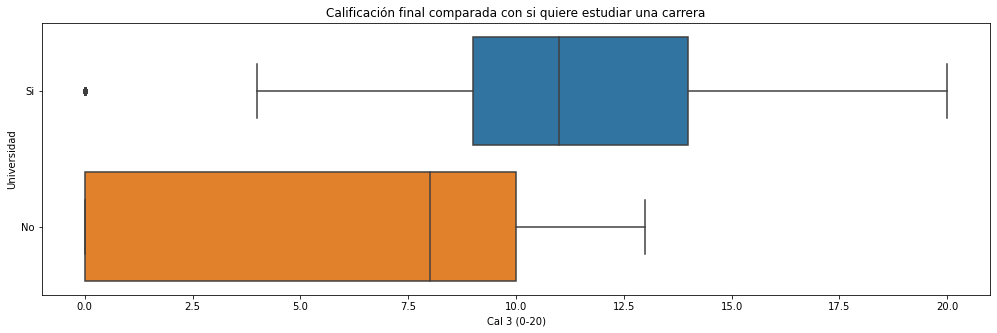

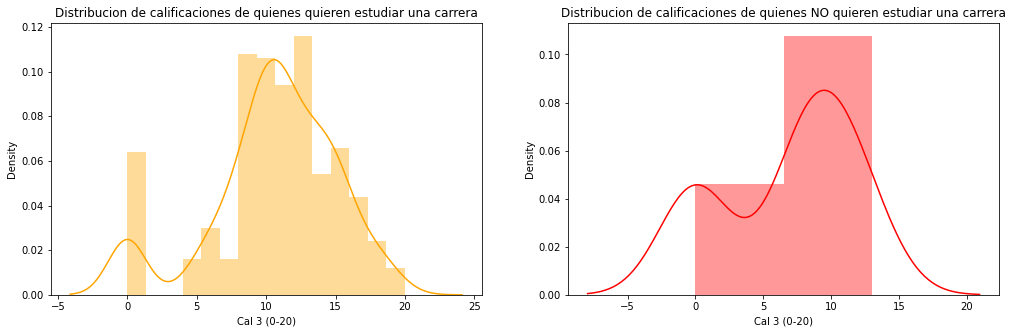

In [214]:
plt.figure(figsize=(17,5))
plt.title("Calificación final comparada con si quiere estudiar una carrera")
sns.boxplot(y="Universidad", x="Cal 3 (0-20)", data = df , orient="h", palette = 'tab10')

f= plt.figure(figsize=(17,5))
ax=f.add_subplot(121)
sns.distplot(df[(df["Universidad"] == 'Si')]["Cal 3 (0-20)"],color='orange',ax=ax)
ax.set_title('Distribucion de calificaciones de quienes quieren estudiar una carrera')

ax=f.add_subplot(122)
sns.distplot(df[(df.Universidad == 'No')]["Cal 3 (0-20)"],color='red',ax=ax)
ax.set_title('Distribucion de calificaciones de quienes NO quieren estudiar una carrera')

Vemos que las calificaciones de los alumnos que quieren seguir estudiando son considerablemente mayores a las de los que no quieren.

## Base secundaria 
Para manejar de una forma mas sencilla los datos, trabajaremos únicamente con los de México

Primero importamos las librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Aqui importamos nuestra base de datos y filtramos solamente la información de México

In [110]:
bd="C:/Users/MARIANA/Desktop/Life Expectancy Data.csv"
base=pd.read_csv(bd)

aa= base[(base['Country'] == "Mexico")]
aa

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1683,Mexico,2015,Developing,76.7,122.0,30,NaN,0.000000,82.0,0,...,87.0,NaN,87.0,0.1,9143.128494,12589949.0,1.5,1.5,0.758,13.3
1684,Mexico,2014,Developing,76.6,122.0,31,5.26,168.173753,84.0,3,...,87.0,6.30,87.0,0.1,1452.277660,1242216.0,1.6,1.5,0.754,13.1
1685,Mexico,2013,Developing,76.6,12.0,32,5.23,150.408875,82.0,0,...,83.0,6.30,83.0,0.1,1298.867660,122535969.0,1.6,1.5,0.753,12.9
1686,Mexico,2012,Developing,76.3,123.0,33,5.29,112.696486,99.0,0,...,99.0,6.21,99.0,0.1,982.532572,1282837.0,1.6,1.5,0.748,12.7
1687,Mexico,2011,Developing,76.1,124.0,34,5.30,1117.196097,98.0,3,...,97.0,6.40,97.0,0.1,9834.472689,119917.0,1.6,1.6,0.745,12.6
1688,Mexico,2010,Developing,75.6,127.0,35,5.21,1033.039737,93.0,0,...,95.0,6.39,95.0,0.1,8959.581416,117318941.0,1.6,1.6,0.739,12.5
1689,Mexico,2009,Developing,75.7,13.0,36,5.27,881.736433,95.0,0,...,95.0,6.60,95.0,0.1,7748.123310,11555228.0,1.7,1.6,0.738,12.5
1690,Mexico,2008,Developing,75.6,127.0,37,5.36,159.877226,97.0,0,...,96.0,6.60,96.0,0.1,9689.528870,11366189.0,1.7,1.6,0.735,12.3
1691,Mexico,2007,Developing,76.0,123.0,38,5.35,105.747613,98.0,0,...,98.0,5.92,98.0,0.1,933.341687,111836346.0,1.7,1.7,0.731,12.3
1692,Mexico,2006,Developing,75.8,125.0,40,5.11,980.253744,98.0,23,...,98.0,5.83,98.0,0.1,8767.922580,1192378.0,1.8,1.7,0.723,12.2


Modificamos nuestra base de datos, removemos columnas innecesarias y cambiamos sus nombres para identificarlas mas facilmente


In [111]:
# Removemos columnas que no necesitaremos
aa= aa.drop(["Status", "Schooling","percentage expenditure","Total expenditure", "GDP", "Schooling", "Income composition of resources"],axis=1)

aa

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,thinness 5-9 years
1683,Mexico,2015,76.7,122.0,30,NaN,82.0,0,63.5,35,87.0,87.0,0.1,12589949.0,1.5,1.5
1684,Mexico,2014,76.6,122.0,31,5.26,84.0,3,62.8,36,87.0,87.0,0.1,1242216.0,1.6,1.5
1685,Mexico,2013,76.6,12.0,32,5.23,82.0,0,62.1,37,83.0,83.0,0.1,122535969.0,1.6,1.5
1686,Mexico,2012,76.3,123.0,33,5.29,99.0,0,61.5,38,99.0,99.0,0.1,1282837.0,1.6,1.5
1687,Mexico,2011,76.1,124.0,34,5.30,98.0,3,6.8,39,97.0,97.0,0.1,119917.0,1.6,1.6
1688,Mexico,2010,75.6,127.0,35,5.21,93.0,0,6.1,40,95.0,95.0,0.1,117318941.0,1.6,1.6
1689,Mexico,2009,75.7,13.0,36,5.27,95.0,0,59.4,42,95.0,95.0,0.1,11555228.0,1.7,1.6
1690,Mexico,2008,75.6,127.0,37,5.36,97.0,0,58.7,43,96.0,96.0,0.1,11366189.0,1.7,1.6
1691,Mexico,2007,76.0,123.0,38,5.35,98.0,0,57.9,45,98.0,98.0,0.1,111836346.0,1.7,1.7
1692,Mexico,2006,75.8,125.0,40,5.11,98.0,23,57.2,47,98.0,98.0,0.1,1192378.0,1.8,1.7


Una vez importadas las librerias y nuestra base de datos, continuamos con la modificación de nuestros datos. 

In [112]:

# Modificamos el nombre de cada columna para que sea mas sencilla su ubicación
aa= aa.rename (columns = {"Year": "Año"})
aa= aa.rename (columns = {"Country": "Pais"})
aa= aa.rename (columns = {"Adult Mortality": "MA"})
aa= aa.rename (columns = {"infant deaths": "MI"})
aa= aa.rename (columns = {"Life expectancy ": "EV"})
aa= aa.rename (columns = {"Population": "Poblacion"})
aa= aa.rename (columns = {" thinness  1-19 years": "D1"})
aa= aa.rename (columns = {" thinness 5-9 years": "D2"})
aa= aa.rename (columns = {" HIV/AIDS": "VIH"})
aa


,Pais,Año,EV,MA,MI,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,VIH,Poblacion,D1,D2
1683,Mexico,2015,76.7,122.0,30,NaN,82.0,0,63.5,35,87.0,87.0,0.1,12589949.0,1.5,1.5
1684,Mexico,2014,76.6,122.0,31,5.26,84.0,3,62.8,36,87.0,87.0,0.1,1242216.0,1.6,1.5
1685,Mexico,2013,76.6,12.0,32,5.23,82.0,0,62.1,37,83.0,83.0,0.1,122535969.0,1.6,1.5
1686,Mexico,2012,76.3,123.0,33,5.29,99.0,0,61.5,38,99.0,99.0,0.1,1282837.0,1.6,1.5
1687,Mexico,2011,76.1,124.0,34,5.30,98.0,3,6.8,39,97.0,97.0,0.1,119917.0,1.6,1.6
1688,Mexico,2010,75.6,127.0,35,5.21,93.0,0,6.1,40,95.0,95.0,0.1,117318941.0,1.6,1.6
1689,Mexico,2009,75.7,13.0,36,5.27,95.0,0,59.4,42,95.0,95.0,0.1,11555228.0,1.7,1.6
1690,Mexico,2008,75.6,127.0,37,5.36,97.0,0,58.7,43,96.0,96.0,0.1,11366189.0,1.7,1.6
1691,Mexico,2007,76.0,123.0,38,5.35,98.0,0,57.9,45,98.0,98.0,0.1,111836346.0,1.7,1.7
1692,Mexico,2006,75.8,125.0,40,5.11,98.0,23,57.2,47,98.0,98.0,0.1,1192378.0,1.8,1.7


## Estadística básica

Obtenemos información estadística sobre nuestra base de datos para poder entenderlos mejor 

In [57]:
x=aa.iloc[:,2] 
y=aa.iloc[:,3]
z=aa.iloc[:,4]
print("Estadisticas descriptivas de la ESPERANZA DE VIDA")
print(x.describe())


Estadisticas descriptivas de la ESPERANZA DE VIDA
count    16.000000
mean     75.718750
std       0.620987
min      74.800000
25%      75.225000
50%      75.650000
75%      76.150000
max      76.700000
Name: EV, dtype: float64


In [58]:
print("Estadisticas descriptivas de la MORTALIDAD DE UN ADULTO")
print(y.describe())

Estadisticas descriptivas de la MORTALIDAD DE UN ADULTO
count     16.000000
mean     111.062500
std       38.528723
min       12.000000
25%      122.750000
50%      124.500000
75%      127.000000
max      129.000000
Name: Mortalidad de adultos, dtype: float64


In [59]:
print("Estadisticas descriptivas de la MORTALIDAD DE INFANTES")
print(z.describe())

Estadisticas descriptivas de la MORTALIDAD DE INFANTES
count    16.00000
mean     39.62500
std       7.69307
min      30.00000
25%      33.75000
50%      37.50000
75%      44.50000
max      55.00000
Name: Mortalidad de infantes, dtype: float64


- Con lo anterior podemos observar que nuestro promedio de esperanza de vida son de 75 años.  
- El promedio de mortalidad de un adulto es de 111, es decir, en promedio mueren 111 por cada 1000 habitantes.  
- El promedio de mortalidad de un niño es de 39.6, es decir, en promedio mueren 36 niños por cada 1000.

In [60]:
menores=sum(aa.EV<50)
mayores=sum(aa.EV>50)
print("La cantidad de personas que mueren antes de los 50:", menores)
print("La cantidad de personas que mueren despues de los 50:", mayores)

La cantidad de personas que mueren antes de los 50: 0
La cantidad de personas que mueren despues de los 50: 16


__Covarianza y correlación__
A continuación se muestra una tabla con la covarianza y correlación de nuestra base de datos

In [113]:
aa.cov()

,Año,EV,MA,MI,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,VIH,Poblacion,D1,D2
Año,2.266667e+01,2.810000e+00,-5.950000e+01,-3.566667e+01,7.321429e-01,-1.950000e+01,-4.573333e+01,-4.923333e+00,-4.466667e+01,-1.563333e+01,-1.526667e+01,0.000000e+00,5.545724e+07,-6.700000e-01,-6.500000e-01
EV,2.810000e+00,3.856250e-01,-7.534583e+00,-4.399167e+00,9.170000e-02,-2.562083e+00,-5.240000e+00,1.116292e+00,-5.470000e+00,-2.081250e+00,-2.033333e+00,-1.840675e-31,7.473534e+06,-8.195833e-02,-7.870833e-02
MA,-5.950000e+01,-7.534583e+00,1.484463e+03,9.555833e+01,-2.372857e+00,9.457083e+01,1.729333e+02,-1.478079e+02,1.187667e+02,9.506250e+01,9.400000e+01,0.000000e+00,-5.963486e+08,1.431250e+00,1.962083e+00
MI,-3.566667e+01,-4.399167e+00,9.555833e+01,5.918333e+01,-1.252571e+00,2.597500e+01,6.926667e+01,1.043417e+01,7.426667e+01,2.109167e+01,2.046667e+01,0.000000e+00,-1.031648e+08,1.079167e+00,1.047500e+00
Alcohol,7.321429e-01,9.170000e-02,-2.372857e+00,-1.252571e+00,4.162571e-02,-2.997143e-01,-2.048143e+00,-5.411286e-01,-1.571857e+00,-3.018571e-01,-2.772857e-01,-1.760850e-33,3.393550e+06,-2.255714e-02,-2.220000e-02
Hepatitis B,-1.950000e+01,-2.562083e+00,9.457083e+01,2.597500e+01,-2.997143e-01,3.626250e+01,3.680000e+01,-2.156875e+01,3.183333e+01,2.877083e+01,2.860000e+01,0.000000e+00,-8.344542e+07,5.120833e-01,5.079167e-01
Measles,-4.573333e+01,-5.240000e+00,1.729333e+02,6.926667e+01,-2.048143e+00,3.680000e+01,3.725333e+02,3.500667e+01,8.866667e+01,2.986667e+01,3.060000e+01,0.000000e+00,-2.136072e+08,1.440000e+00,1.466667e+00
BMI,-4.923333e+00,1.116292e+00,-1.478079e+02,1.043417e+01,-5.411286e-01,-2.156875e+01,3.500667e+01,3.196376e+02,1.723667e+01,-1.792792e+01,-1.810667e+01,3.944305e-32,-1.827703e+08,4.500417e-01,1.462500e-02
under-five deaths,-4.466667e+01,-5.470000e+00,1.187667e+02,7.426667e+01,-1.571857e+00,3.183333e+01,8.866667e+01,1.723667e+01,9.333333e+01,2.590000e+01,2.513333e+01,0.000000e+00,-1.303412e+08,1.356667e+00,1.316667e+00
Polio,-1.563333e+01,-2.081250e+00,9.506250e+01,2.109167e+01,-3.018571e-01,2.877083e+01,2.986667e+01,-1.792792e+01,2.590000e+01,2.366250e+01,2.346667e+01,0.000000e+00,-7.424895e+07,4.045833e-01,4.154167e-01


In [37]:
aa.corr()

,Año,EV,Mortalidad de adultos,Mortalidad de infantes,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,Poblacion,Delgadez entre 1-19 años,Delgadez entre 5-9 años
Año,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.134337,-0.139741,0.016969,-0.047876,-0.050929
EV,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.479495,-0.556556,-0.021538,-0.477183,-0.471584
Mortalidad de adultos,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.275131,0.523821,-0.013647,0.302904,0.308457
Mortalidad de infantes,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.175171,0.025231,0.556801,0.465711,0.471350
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.222020,-0.048845,-0.035252,-0.428795,-0.417414
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.611495,-0.112675,-0.123321,-0.120429,-0.124960
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.141882,0.030899,0.265966,0.224808,0.221072
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.283147,-0.243717,-0.072301,-0.532025,-0.538911
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.195668,0.038062,0.544423,0.467789,0.472263
Polio,0.094158,0.465556,-0.274823,-0.170689,0.221734,0.486171,-0.136166,0.284569,-0.188720,1.000000,0.673553,-0.159560,-0.038540,-0.221823,-0.222592


## Gráficos 
Haremos unos gráficos para dar un poco mas de contexto a nuestra base de datos. 

In [127]:
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
aa

,Pais,Año,EV,MA,MI,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,VIH,Poblacion,D1,D2
1683,Mexico,2015,76.7,122.0,30,NaN,82.0,0,63.5,35,87.0,87.0,0.1,12589949.0,1.5,1.5
1684,Mexico,2014,76.6,122.0,31,5.26,84.0,3,62.8,36,87.0,87.0,0.1,1242216.0,1.6,1.5
1685,Mexico,2013,76.6,12.0,32,5.23,82.0,0,62.1,37,83.0,83.0,0.1,122535969.0,1.6,1.5
1686,Mexico,2012,76.3,123.0,33,5.29,99.0,0,61.5,38,99.0,99.0,0.1,1282837.0,1.6,1.5
1687,Mexico,2011,76.1,124.0,34,5.30,98.0,3,6.8,39,97.0,97.0,0.1,119917.0,1.6,1.6
1688,Mexico,2010,75.6,127.0,35,5.21,93.0,0,6.1,40,95.0,95.0,0.1,117318941.0,1.6,1.6
1689,Mexico,2009,75.7,13.0,36,5.27,95.0,0,59.4,42,95.0,95.0,0.1,11555228.0,1.7,1.6
1690,Mexico,2008,75.6,127.0,37,5.36,97.0,0,58.7,43,96.0,96.0,0.1,11366189.0,1.7,1.6
1691,Mexico,2007,76.0,123.0,38,5.35,98.0,0,57.9,45,98.0,98.0,0.1,111836346.0,1.7,1.7
1692,Mexico,2006,75.8,125.0,40,5.11,98.0,23,57.2,47,98.0,98.0,0.1,1192378.0,1.8,1.7


Text(6.799999999999997, 0.5, 'Personas')

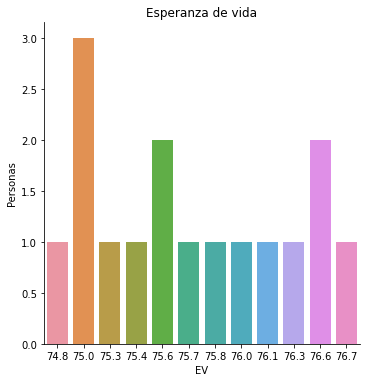

In [64]:

sns.catplot(x="EV", kind="count", data=aa)
plt.title("Esperanza de vida")
plt.ylabel("Personas")

En esta gráfica podemos observar que a la edad a la que mas personas fallecen es a los 75 años, por lo que, comparando este dato con las estadisticas obtenidas anteriormente, nuestro cálculo fue correcto.

Text(16.424999999999997, 0.5, 'Personas')

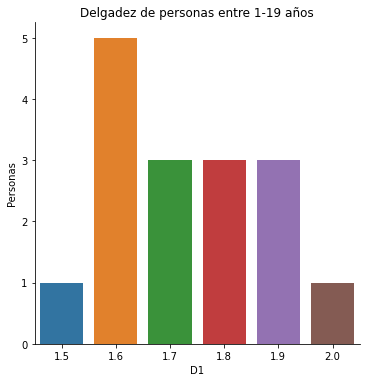

In [65]:
sns.catplot(x="D1", kind="count", data=aa)
plt.title("Delgadez de personas entre 1-19 años")
plt.ylabel("Personas")

Text(0, 0.5, 'Personas')

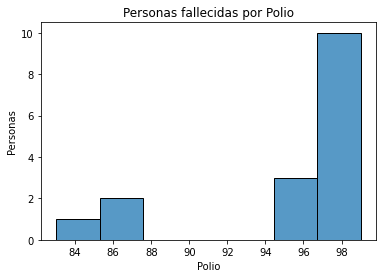

In [135]:
sns.histplot(aa["Polio"])
plt.title("Personas fallecidas por Polio")
plt.ylabel("Personas")

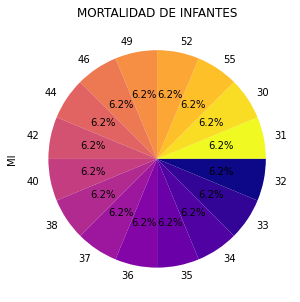

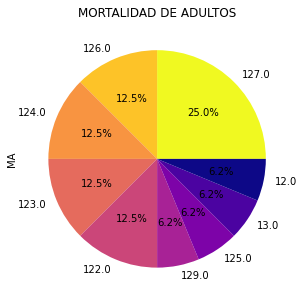

In [116]:
import matplotlib as plt 
from matplotlib import pyplot
from matplotlib import colors 
from matplotlib import cm 
plt.pyplot.figure(figsize=(5,5))
aa['MI'].value_counts().plot.pie(autopct="%0.1f%%", cmap= "plasma_r")
plt.pyplot.title("MORTALIDAD DE INFANTES")
plt.pyplot.show()

plt.pyplot.figure(figsize=(5,5))
aa['MA'].value_counts().plot.pie(autopct="%0.1f%%", cmap= "plasma_r")
plt.pyplot.title("MORTALIDAD DE ADULTOS")
plt.pyplot.show()

En el gráfico anterior se muestra el porcentaje de la Mortalidad de Infantes y de la Mortalidad de adultos por año

Text(0.5, 1.0, 'Niños fallecidos con delgadez')

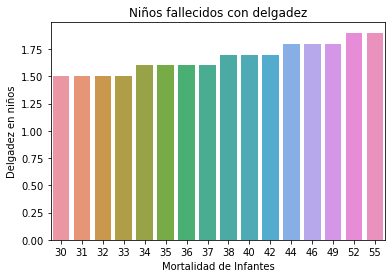

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=aa['MI'],y=aa['D2'])
plt.xlabel("Mortalidad de Infantes")
plt.ylabel("Delgadez en niños")
plt.title("Niños fallecidos con delgadez")

Podemos observar la mortalidad de infantes dependiendo de la delgadez de un niño entre 5 y 9 años de edad.

<AxesSubplot:xlabel='Año', ylabel='Poblacion'>

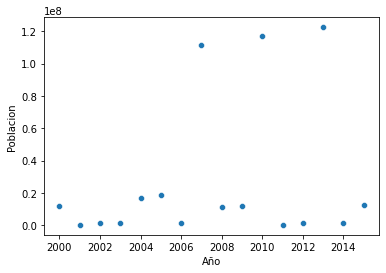

In [133]:
sns.scatterplot(x=aa["Año"], y=aa["Poblacion"])

En este gráfico se observa la población por año en México, podemos ver que el año con mas población fue el 2013

<AxesSubplot:>

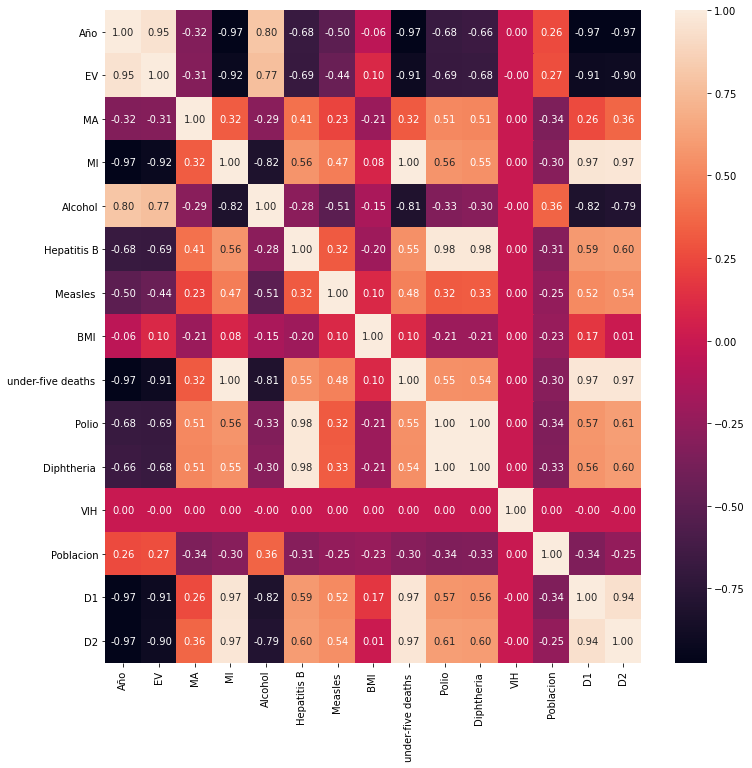

In [134]:
plt.figure(figsize=(12,12))
sns.heatmap(aa.corr(),annot = True,fmt = ".2f",cbar = True)


Text(0.5, 1.0, 'Esperanza de vida por año')

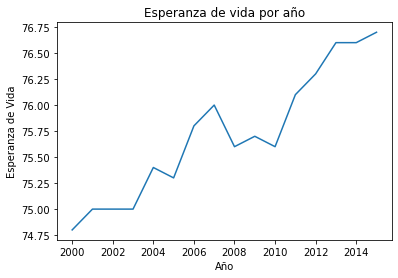

In [141]:
x= aa.iloc[:,1] 
y= aa.iloc[:,2]
plt.plot(x,y)
plt.xlabel("Año")
plt.ylabel("Esperanza de Vida")
plt.title("Esperanza de vida por año")

En este grafico podemos observar el aumento de la esperanza de vida por año de una persona.

Text(0.5, 1.0, 'Mortalidad de infantes por año')

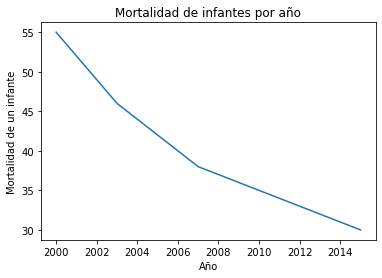

In [147]:
x= aa.iloc[:,1] 
y= aa.iloc[:,4]
plt.plot(x,y)
plt.xlabel("Año")
plt.ylabel("Mortalidad de un infante")
plt.title("Mortalidad de infantes por año")

En el gráfico anterior se muestra el decremento de la Mortalidad de infantes por año, bajando desde 55 infantes por cada 1000, a 30 infantes.